In [2]:
import pandas as pan
import numpy as np
import matplotlib.pyplot as plotter
import seaborn as sns
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline

In [3]:
matrix_data = pan.read_csv("moviereviews.csv")

In [4]:
#missing values: 35
matrix_data.isna().sum().sum()

35

In [6]:
matrix_data.dropna(axis = 0, inplace = True)

In [21]:
def notBlank(str):
    return bool(str and not str.isspace())
matrix_data["isnotempty"] = matrix_data["review"].apply(notBlank)
matrix_data.drop(index = matrix_data[matrix_data["isnotempty"] == False].index, axis = 0, inplace = True)
matrix_data.drop("isnotempty", axis = 1, inplace = True)

In [42]:
matrix_data["label"].value_counts()

,label,review
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
11,pos,"with stars like sigourney weaver ( "" alien "" t..."
16,pos,i remember hearing about this film when it fir...
18,pos,garry shandling makes his long overdue starrin...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [43]:
cvr =CountVectorizer(stop_words = "english")
cvr2 = CountVectorizer(stop_words = "english")
cvr.fit(matrix_data[matrix_data["label"] == "pos"]["review"])
cvr2.fit(matrix_data[matrix_data["label"] == "neg"]["review"])

CountVectorizer(stop_words='english')

In [44]:
matrix = cvr.transform(matrix_data[matrix_data["label"] == "pos"]["review"])
matrix_two = cvr2.transform(matrix_data[matrix_data["label"] == "neg"]["review"])
freqs_one = zip(cvr.get_feature_names_out(), matrix.sum(axis=0).tolist()[0])
freqs_two = zip(cvr2.get_feature_names_out(), matrix_two.sum(axis=0).tolist()[0])
print(sorted(freqs_one, key = lambda x: -x[1])[: 21])
print(sorted(freqs_two, key = lambda x: -x[1])[: 21])

[('film', 5002), ('movie', 2389), ('like', 1721), ('just', 1273), ('story', 1199), ('good', 1193), ('time', 1175), ('character', 1037), ('life', 1032), ('characters', 957), ('way', 864), ('films', 851), ('does', 828), ('best', 788), ('people', 769), ('make', 764), ('little', 751), ('really', 731), ('man', 728), ('new', 702), ('great', 692)]
[('film', 4063), ('movie', 3131), ('like', 1808), ('just', 1480), ('time', 1127), ('good', 1117), ('bad', 997), ('character', 926), ('story', 908), ('plot', 888), ('characters', 838), ('make', 813), ('really', 743), ('way', 734), ('little', 696), ('don', 683), ('does', 666), ('doesn', 648), ('action', 635), ('scene', 634), ('people', 628)]


In [46]:
#modelling 
feature = matrix_data["review"]
label = matrix_data["label"]
feature_train, feature_test, label_train, label_test = train_test_split(feature, label, test_size = 0.2, random_state = 42)
pipe = Pipeline([("t_vectorizer", TfidfVectorizer(stop_words = "english")), ("svc", SVC())])
param_grid = {"svc__C": [0.01, 0.1, 1, 10], "svc__gamma": ["scale", "auto"]}
gridder = GridSearchCV(pipe, param_grid, n_jobs = 7, verbose = 1)

In [47]:
gridder.fit(feature_train, label_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(estimator=Pipeline(steps=[('t_vectorizer',
                                        TfidfVectorizer(stop_words='english')),
                                       ('svc', SVC())]),
             n_jobs=7,
             param_grid={'svc__C': [0.01, 0.1, 1, 10],
                         'svc__gamma': ['scale', 'auto']},
             verbose=1)

In [49]:
predictions = gridder.predict(feature_test)

              precision    recall  f1-score   support

         neg       0.82      0.82      0.82       188
         pos       0.83      0.83      0.83       200

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



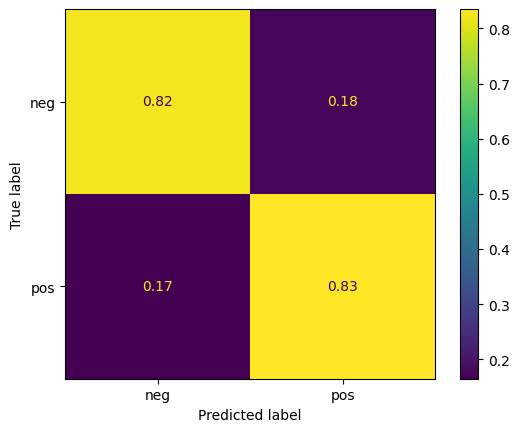

In [51]:
print(classification_report(label_test, predictions))
ConfusionMatrixDisplay.from_predictions(label_test, predictions, normalize = "true")

In [55]:
gridder.predict(["What a wonderful movie. I can even believe that people want to see this"])

array(['pos'], dtype=object)